### logistic regression task 

https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+system+based+on+Multisensor+data+fusion+%28AReM%29#
    
Task Logistic Regression
~~~~~~~~~~~~~~~~~~~~~~~~~~~
1. WAP to read folder name and make a label in the csv with folder name
2. Remove unneccesarry info in Automated way
3. No other algorithm must be used other than Logistic Regression
4. Try to utilize multiple solvers and make multiple models
5. Provide the best models
6. EDA and all must be done accordingly
Note: No manual approaches will be appreciated

Import necessary liberaries

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer
import seaborn as sns
import pickle
import os
import glob

Read the files present in the subfolders and merge them into a single dataframe and write to a new csv file

In [2]:
path = r'H:\Data Science\ineuron\Task and challenges\Logistic Regression Task\AReM' # use your path
multDir = os.listdir(path)
lst = []
 
for dir in multDir:
    dirpath = path+'\\'+dir   
    all_files = glob.glob(dirpath + "/*.csv")
    dirName = dirpath.split("\\")[-1]
    li = []
    for filename in all_files: 
        df = pd.read_csv(filename, error_bad_lines=False, index_col=None,skiprows = 4, sep=',') 
        df['label'] = dirName
        li.append(df)
    lst.extend(li)
frame = pd.concat(lst)
my_df = pd.DataFrame(frame)
my_df.to_csv('dataset.csv')

b'Skipping line 485: expected 7 fields, saw 8\n'
b'Skipping line 485: expected 7 fields, saw 8\n'


In [3]:
df_frame = pd.read_csv('dataset.csv')

In [4]:
df_frame

Unnamed: 0 # Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  \
0               0               0      39.25       0.43      22.75       0.43   
1               1             250      39.25       0.43      23.00       0.00   
2               2             500      39.25       0.43      23.25       0.43   
3               3             750      39.50       0.50      23.00       0.71   
4               4            1000      39.50       0.50      24.00       0.00   
...           ...             ...        ...        ...        ...        ...   
42232         475          118750      31.50       1.66      12.50       3.20   
42233         476          119000      27.33       1.25      11.33       0.94   
42234         477          119250      37.80       7.68      14.20       2.48   
42235         478          119500      33.75       1.30      15.75       5.21   
42236         479          119750      32.67       3.09      18.67       0.47   

       avg_rss23  var_rss23     label  
0          33.75       1.30  bending1  
1          33.00       0.00  bending1  
2          33.00       0.00  bending1  
3          33.00       0.00  bending1  
4          33.00       0.00  bending1  
...          ...        ...       ...  
42232      14.25       4.44   walking  
42233      20.00       4.00   walking  
42234      17.25       0.83   walking  
42235      16.50       2.69   walking  
42236      14.00       3.16   walking  

[42237 rows x 9 columns]

Let's Drop the index column

In [5]:
df_frame = df_frame.loc[:, ~df_frame.columns.str.contains('^Unnamed')]

In [6]:
df_frame.head()

# Columns: time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0               0      39.25       0.43      22.75       0.43      33.75   
1             250      39.25       0.43      23.00       0.00      33.00   
2             500      39.25       0.43      23.25       0.43      33.00   
3             750      39.50       0.50      23.00       0.71      33.00   
4            1000      39.50       0.50      24.00       0.00      33.00   

   var_rss23     label  
0        1.3  bending1  
1        0.0  bending1  
2        0.0  bending1  
3        0.0  bending1  
4        0.0  bending1

In [7]:
df_frame = df_frame.rename(columns={'# Columns: time': 'time'})

In [8]:
df_frame.head()

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  var_rss23  \
0     0      39.25       0.43      22.75       0.43      33.75        1.3   
1   250      39.25       0.43      23.00       0.00      33.00        0.0   
2   500      39.25       0.43      23.25       0.43      33.00        0.0   
3   750      39.50       0.50      23.00       0.71      33.00        0.0   
4  1000      39.50       0.50      24.00       0.00      33.00        0.0   

      label  
0  bending1  
1  bending1  
2  bending1  
3  bending1  
4  bending1

In [9]:
ProfileReport(df_frame)

bending2 folder has a file contains data which is not comma sepearted as other files. That is handled by following code.     
Steps as follows

1) First select the part of data which has tab seperated data. 

2) For visualization of converted that data into HTML Code.

3) Tab seperated data taken into a new dataframe.

4) Splitted the data by tab delimiter.

5) New created columns were in integer format hence written code to Converted it into string.

6) Rename the columns as same as original dataframe.

7) Deleted tab seperated rows from original columns.

8) Concatinated the new dataframe to original data frame.

In [10]:
from IPython.core.display import HTML
d = df_frame[df_frame['label'] == 'bending2']
#display(HTML(d.to_html()))

In [11]:
splitdf = df_frame.loc[np.r_[4800:5280], :]
splitdf.head()

time  avg_rss12  var_rss12  avg_rss13  \
4800     0 32.50 0.50 0.00 0.00 19.00 1.00         NaN        NaN        NaN   
4801   250 32.50 0.50 0.00 0.00 18.50 0.50         NaN        NaN        NaN   
4802   500 32.75 0.43 1.00 0.00 18.00 0.00         NaN        NaN        NaN   
4803   750 32.50 0.50 0.00 0.00 17.50 0.50         NaN        NaN        NaN   
4804  1000 32.50 0.50 7.50 0.50 17.50 0.87         NaN        NaN        NaN   

      var_rss13  avg_rss23  var_rss23     label  
4800        NaN        NaN        NaN  bending2  
4801        NaN        NaN        NaN  bending2  
4802        NaN        NaN        NaN  bending2  
4803        NaN        NaN        NaN  bending2  
4804        NaN        NaN        NaN  bending2

In [12]:
splitdf.tail()

time  avg_rss12  var_rss12  \
5275  118750 28.67 0.47 4.67 1.25 17.33 0.47         NaN        NaN   
5276  119000 27.50 0.50 5.50 2.50 17.25 1.30         NaN        NaN   
5277  119250 28.00 0.00 6.67 0.94 17.00 1.00         NaN        NaN   
5278  119500 28.00 0.00 5.00 0.82 17.00 0.71         NaN        NaN   
5279  119750 28.00 0.00 0.00 0.00 17.00 1.00         NaN        NaN   

      avg_rss13  var_rss13  avg_rss23  var_rss23     label  
5275        NaN        NaN        NaN        NaN  bending2  
5276        NaN        NaN        NaN        NaN  bending2  
5277        NaN        NaN        NaN        NaN  bending2  
5278        NaN        NaN        NaN        NaN  bending2  
5279        NaN        NaN        NaN        NaN  bending2

In [13]:
sdf = splitdf.time.str.split(" ",expand=True)

In [14]:
sdf.columns

RangeIndex(start=0, stop=8, step=1)

In [15]:
sdf.columns = sdf.columns.astype(str)

In [16]:
sdf.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7'], dtype='object')

In [17]:
sdf.rename(columns = {'0' : 'time','1' : 'avg_rss12','2' : 'var_rss12','3' : 'avg_rss13','4' : 'var_rss13','5' : 'avg_rss23','6' : 'var_rss23','7':'label'}, inplace = True)
sdf.head()

time avg_rss12 var_rss12 avg_rss13 var_rss13 avg_rss23 var_rss23 label
4800     0     32.50      0.50      0.00      0.00     19.00      1.00      
4801   250     32.50      0.50      0.00      0.00     18.50      0.50      
4802   500     32.75      0.43      1.00      0.00     18.00      0.00      
4803   750     32.50      0.50      0.00      0.00     17.50      0.50      
4804  1000     32.50      0.50      7.50      0.50     17.50      0.87

In [18]:
sdf['label'] = 'bending2'
sdf.head()

time avg_rss12 var_rss12 avg_rss13 var_rss13 avg_rss23 var_rss23  \
4800     0     32.50      0.50      0.00      0.00     19.00      1.00   
4801   250     32.50      0.50      0.00      0.00     18.50      0.50   
4802   500     32.75      0.43      1.00      0.00     18.00      0.00   
4803   750     32.50      0.50      0.00      0.00     17.50      0.50   
4804  1000     32.50      0.50      7.50      0.50     17.50      0.87   

         label  
4800  bending2  
4801  bending2  
4802  bending2  
4803  bending2  
4804  bending2

In [19]:
sdf.tail()

time avg_rss12 var_rss12 avg_rss13 var_rss13 avg_rss23 var_rss23  \
5275  118750     28.67      0.47      4.67      1.25     17.33      0.47   
5276  119000     27.50      0.50      5.50      2.50     17.25      1.30   
5277  119250     28.00      0.00      6.67      0.94     17.00      1.00   
5278  119500     28.00      0.00      5.00      0.82     17.00      0.71   
5279  119750     28.00      0.00      0.00      0.00     17.00      1.00   

         label  
5275  bending2  
5276  bending2  
5277  bending2  
5278  bending2  
5279  bending2

In [20]:
df_frame.drop(df_frame.index[4800:5278], inplace =True)

In [21]:
df_frame.shape

(41759, 8)

In [22]:
df_frame = pd.concat([df_frame, sdf])
df_frame.shape

(42239, 8)

In [23]:
df_frame.head()

time avg_rss12 var_rss12 avg_rss13 var_rss13 avg_rss23 var_rss23     label
0     0     39.25      0.43     22.75      0.43     33.75       1.3  bending1
1   250     39.25      0.43        23         0        33         0  bending1
2   500     39.25      0.43     23.25      0.43        33         0  bending1
3   750      39.5       0.5        23      0.71        33         0  bending1
4  1000      39.5       0.5        24         0        33         0  bending1

In [24]:
df_frame.dtypes

time         object
avg_rss12    object
var_rss12    object
avg_rss13    object
var_rss13    object
avg_rss23    object
var_rss23    object
label        object
dtype: object

In [25]:
df_frame.columns

Index(['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23',
       'var_rss23', 'label'],
      dtype='object')

Replaced object datatype into numeric data type 

In [26]:
cols = ['time', 'avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23','var_rss23']
df_frame[cols] = df_frame[cols].apply(pd.to_numeric, errors='coerce', axis=1)

Replaced 0 with mean

In [27]:
df['avg_rss12'] = df['avg_rss12'].replace(0,df['avg_rss12'].mean())
df['var_rss12'] = df['var_rss12'].replace(0,df['var_rss12'].mean())
df['avg_rss13'] = df['avg_rss13'].replace(0,df['avg_rss13'].mean())
df['var_rss13'] = df['var_rss13'].replace(0,df['var_rss13'].mean())
df['avg_rss23'] = df['avg_rss23'].replace(0,df['avg_rss23'].mean())
df['var_rss23'] = df['var_rss23'].replace(0,df['var_rss23'].mean())

In [28]:
ProfileReport(df_frame)

By profiling report we can say that there are few nan values in the dataframe let's replace these with mean

In [29]:
df_frame=df_frame.mask(df_frame==0).fillna(df_frame.mean())

Let's plot a box plot to check outliers.

<AxesSubplot:>

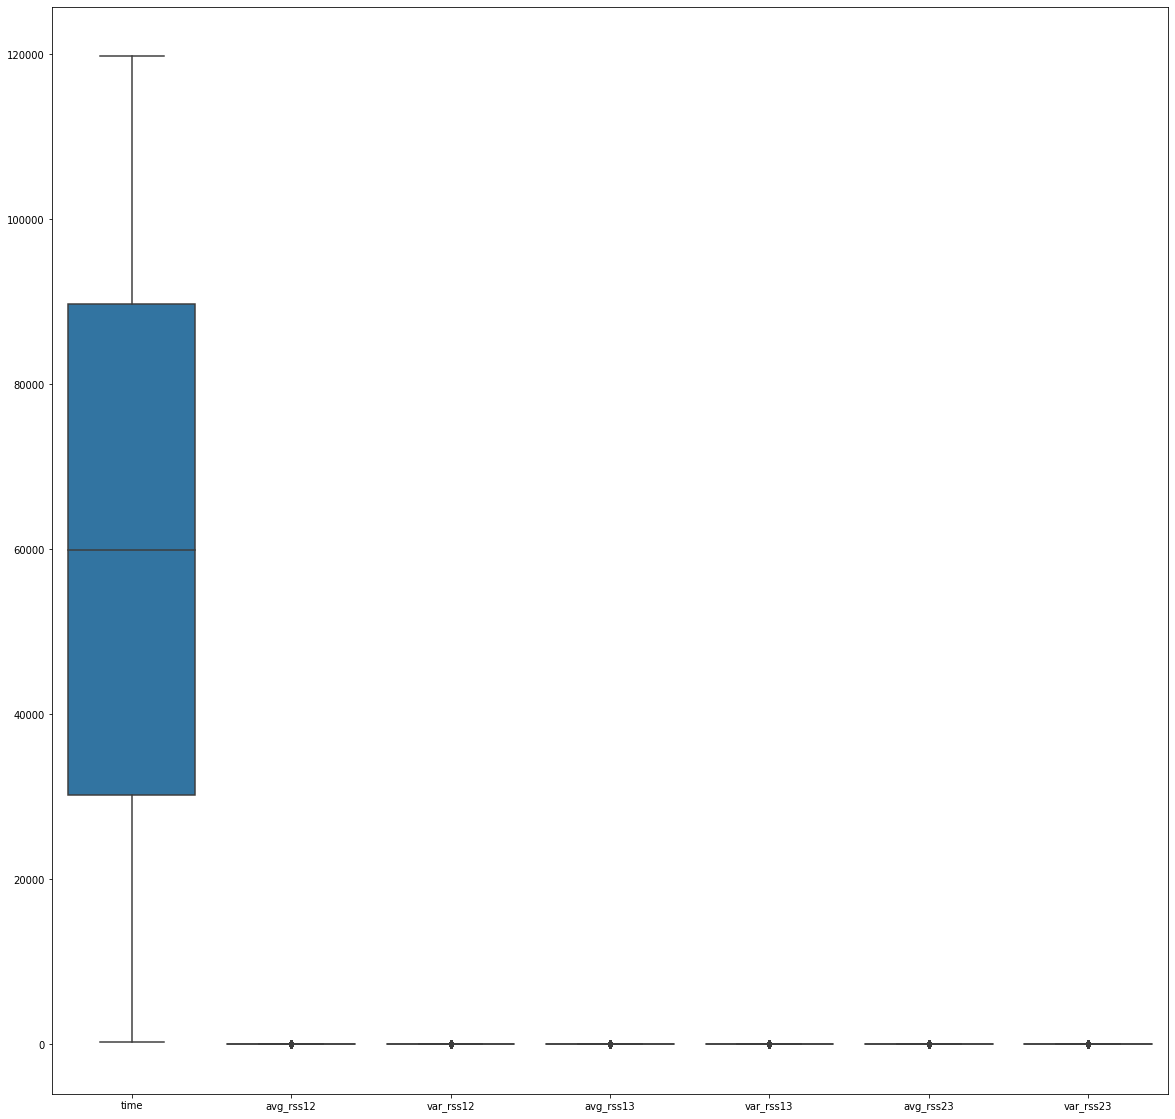

In [30]:
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_frame , ax = ax)

We don't find any outliers in the data.

Let's convert label data to numeric by makin use of label encoding

In [31]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df_frame['label']= label_encoder.fit_transform(df_frame['label'])
 

In [32]:
df_frame.head()

time  avg_rss12  var_rss12  avg_rss13  var_rss13  avg_rss23  \
0  59873.262779      39.25       0.43      22.75   0.430000      33.75   
1    250.000000      39.25       0.43      23.00   1.502218      33.00   
2    500.000000      39.25       0.43      23.25   0.430000      33.00   
3    750.000000      39.50       0.50      23.00   0.710000      33.00   
4   1000.000000      39.50       0.50      24.00   1.502218      33.00   

   var_rss23  label  
0    1.30000      0  
1    1.62069      0  
2    1.62069      0  
3    1.62069      0  
4    1.62069      0

In [33]:
df_frame['label'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [34]:
X = df_frame.drop(columns=['label'])

In [35]:
y = df_frame['label']
y

0       0
1       0
2       0
3       0
4       0
       ..
5275    1
5276    1
5277    1
5278    1
5279    1
Name: label, Length: 42239, dtype: int32

In [36]:
scalar = StandardScaler()
ProfileReport(pd.DataFrame(scalar.fit_transform(X)))
X_scaled = scalar.fit_transform(X)

<AxesSubplot:>

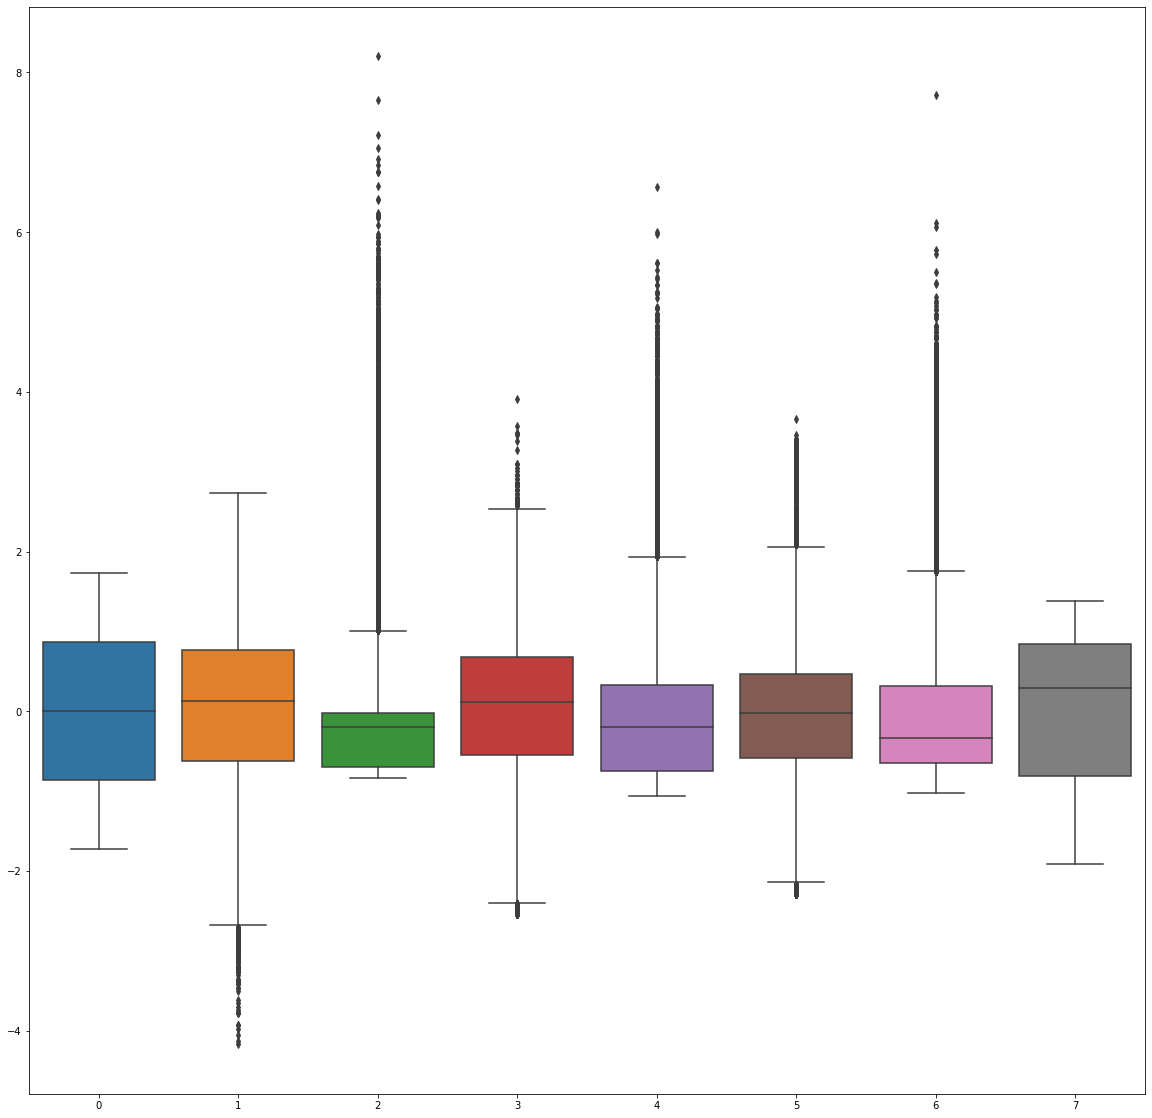

In [37]:
df_new_scalar = pd.DataFrame(scalar.fit_transform(df_frame))
fig ,ax  = plt.subplots(figsize = (20,20))
sns.boxplot(data = df_new_scalar , ax = ax)

In [38]:
X_scaled

array([[-0.00361248,  0.05224084, -0.7415518 , ..., -0.93447917,
         2.66389183, -0.33362793],
       [-1.73032329,  0.05224084, -0.7415518 , ..., -0.20338401,
         2.55045236, -0.12385922],
       [-1.7230832 ,  0.05224084, -0.7415518 , ..., -0.93447917,
         2.55045236, -0.12385922],
       ...,
       [ 1.71595885, -1.72458971, -0.19380676, ..., -0.58673408,
         0.13041014, -0.52986273],
       [ 1.72319894, -1.72458971, -0.19380676, ..., -0.66855645,
         0.13041014, -0.71955637],
       [ 1.73043903, -1.72458971, -0.19380676, ..., -0.20338401,
         0.13041014, -0.52986273]])

In [39]:
y

0       0
1       0
2       0
3       0
4       0
       ..
5275    1
5276    1
5277    1
5278    1
5279    1
Name: label, Length: 42239, dtype: int32

In [40]:
df_frame.isnull().sum().sum()

0

In [41]:
def vif_score(x):
    scaler = StandardScaler()
    arr = scaler.fit_transform(x)
    return pd.DataFrame([[x.columns[i], variance_inflation_factor(arr,i)] for i in range(arr.shape[1])], columns=["FEATURE", "VIF_SCORE"])


In [42]:
vif_score(X)

FEATURE  VIF_SCORE
0       time   1.000111
1  avg_rss12   1.171781
2  var_rss12   1.514874
3  avg_rss13   1.306030
4  var_rss13   1.439876
5  avg_rss23   1.269351
6  var_rss23   1.502103

fd

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled , y , test_size = .20 , random_state = 144)

In [44]:
x_train

array([[-0.84703249,  1.43422016, -0.19380676, ..., -0.88674945,
        -1.58328226, -0.8765442 ],
       [ 1.15847204, -1.40870873, -0.19380676, ..., -0.63446379,
         0.58416805, -0.71955637],
       [-0.73119107,  1.35524992, -0.70429537, ...,  0.33376764,
        -0.0208425 , -0.52986273],
       ...,
       [ 0.52858433, -1.1449481 ,  1.08401352, ...,  3.54529583,
        -0.09646882,  2.41365921],
       [-0.60086948,  1.01251905, -0.72026241, ..., -0.90720504,
        -0.5880399 , -0.90270884],
       [-1.45519992, -0.46106576, -0.19380676, ..., -0.20489633,
        -0.7771057 , -0.26167517]])

In [45]:
x_test

array([[ 0.94126938, -0.61900626,  2.45717927, ...,  4.76581291,
         0.43291541,  0.28124109],
       [-1.69412285, -1.40870873, -0.19380676, ..., -0.11625542,
         0.35728909, -0.61489781],
       [ 0.87610858,  0.96039868, -0.19380676, ..., -0.74356029,
        -0.5880399 , -0.90270884],
       ...,
       [ 1.29603372,  0.96039868, -0.19380676, ..., -0.88674945,
         0.47072857, -0.33362793],
       [ 1.15123195,  0.21018134, -0.52865789, ..., -0.20338401,
        -2.13837945, -0.64760361],
       [ 0.77474734,  0.64451769, -0.59252606, ..., -0.93447917,
         0.73542069, -0.12385922]])

In [46]:
# function to calculate roc Auc score for multinominal classification
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)


solver='newton-cg' for multinominal classification

In [47]:
logr_newton_cg = LogisticRegression(verbose=1,solver='newton-cg')
logr_newton_cg.fit(x_train,y_train )
predictions = logr_newton_cg.predict(x_test)
print(classification_report(y_test,predictions))
res= multiclass_roc_auc_score(y_test,predictions)
print("ROC AUC Score:",res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       641
           1       0.69      0.68      0.68       576
           2       0.58      0.60      0.59      1437
           3       0.74      0.82      0.78      1478
           4       0.47      0.48      0.47      1405
           5       0.64      0.60      0.62      1448
           6       0.68      0.64      0.66      1463

    accuracy                           0.65      8448
   macro avg       0.67      0.66      0.66      8448
weighted avg       0.65      0.65      0.65      8448

ROC AUC Score: 0.7999398845944438


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.5s finished


solver='sag' for multinominal classification

In [48]:
logr_sag = LogisticRegression(verbose=1,solver='sag')
logr_sag.fit(x_train,y_train )
predictions = logr_sag.predict(x_test)
print(classification_report(y_test,predictions))
res= multiclass_roc_auc_score(y_test,predictions)
print("ROC AUC Score:",res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 21 epochs took 2 seconds
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       641
           1       0.69      0.68      0.68       576
           2       0.58      0.60      0.59      1437
           3       0.74      0.82      0.78      1478
           4       0.47      0.48      0.47      1405
           5       0.64      0.60      0.62      1448
           6       0.68      0.64      0.66      1463

    accuracy                           0.65      8448
   macro avg       0.67      0.66      0.66      8448
weighted avg       0.65      0.65      0.65      8448

ROC AUC Score: 0.7999398845944438


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.4s finished


solver='saga' for multinominal classification

In [49]:
logr_saga = LogisticRegression(verbose=1,solver='saga')
logr_saga.fit(x_train,y_train )
predictions = logr_saga.predict(x_test)
print(classification_report(y_test,predictions))
res= multiclass_roc_auc_score(y_test,predictions)
print("ROC AUC Score:",res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 14 epochs took 2 seconds
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       641
           1       0.69      0.68      0.68       576
           2       0.58      0.60      0.59      1437
           3       0.74      0.82      0.78      1478
           4       0.47      0.48      0.47      1405
           5       0.64      0.60      0.62      1448
           6       0.68      0.64      0.66      1463

    accuracy                           0.65      8448
   macro avg       0.67      0.66      0.66      8448
weighted avg       0.65      0.65      0.65      8448

ROC AUC Score: 0.7999398845944438


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s finished


solver='lbfgs' for multinominal classification

In [50]:
logr_lbfgs = LogisticRegression(verbose=1,solver='lbfgs')
logr_lbfgs.fit(x_train,y_train )
predictions = logr_lbfgs.predict(x_test)
print(classification_report(y_test,predictions))
res= multiclass_roc_auc_score(y_test,predictions)
print("ROC AUC Score:",res)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       0.85      0.81      0.83       641
           1       0.69      0.68      0.68       576
           2       0.58      0.60      0.59      1437
           3       0.74      0.82      0.78      1478
           4       0.47      0.48      0.47      1405
           5       0.64      0.60      0.62      1448
           6       0.68      0.64      0.66      1463

    accuracy                           0.65      8448
   macro avg       0.67      0.66      0.66      8448
weighted avg       0.65      0.65      0.65      8448

ROC AUC Score: 0.7999398845944438


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s finished
